# Nudging

In [8]:
# Generate ROMS and SOSE Xarray datasets
import xarray as xr
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as ocm

src_path = os.path.join(os.environ.get('projdir'),'src')
sys.path.append(src_path)
# import my functions
import features.roms_ds as roms_ds

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [6]:
#load roms_data
rds_path = os.path.join(os.environ.get('rawdir'),'waom10','ocean_avg_0005.nc')
low = roms_ds.make_roms_ds(rds_path)

set up multifile dataset
set up 3D xi and eta arrays, fill with NaNs where invalid and apply as coordinates
calculate 4D depth array, fill with NaNs where invalid and apply as coordinate


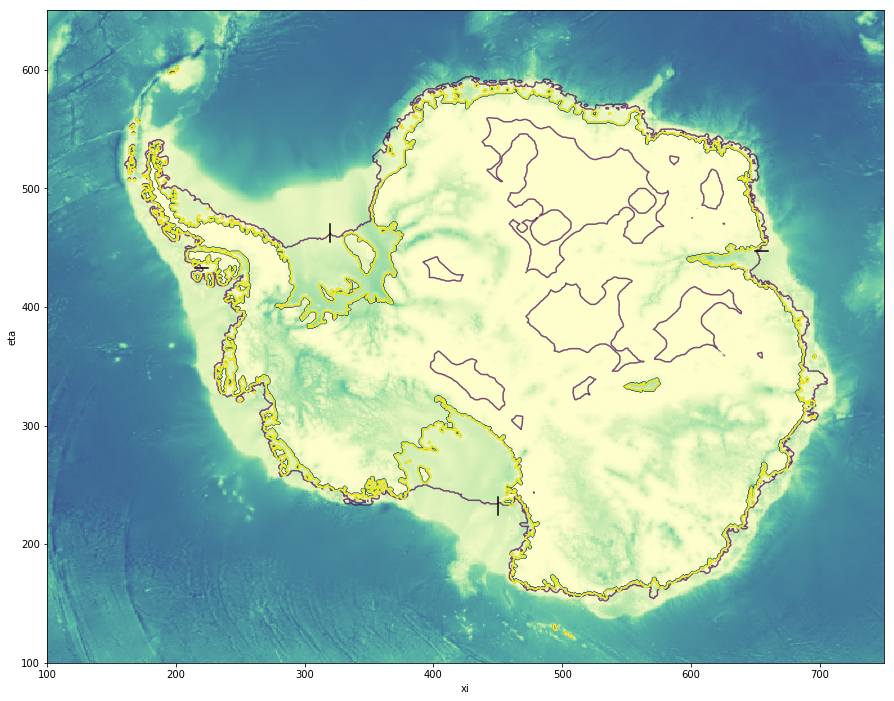

In [10]:
### defining the transsects and plotting them on top of bathy and ice front
plt.close()
fig = plt.figure(figsize=(15,12))
plt.pcolormesh(low.h,cmap=ocm.deep)
plt.contour(low.zice,[-0.01],alpha=0.7)
plt.contour(low.mask_rho)
plt.xlabel('xi')
plt.ylabel('eta')
#linescodeline = [xi_min,eta_min,xi_max,eta_max]
amery=[650,447,660,447,"amery"]
ross=[450,225,450,240,"ross"]
weddell=[320,455,320,470,"weddel"]
bellinghausen=[215,433,225,433,"bellinghausen"]

for line in [amery,ross,weddell,bellinghausen]:
    plt.plot((line[0],line[2]),(line[1],line[3]),"k-")

plt.xlim((100,750))
plt.ylim((100,650))
plt.show()

In [12]:
from ipywidgets import interact
def plot_cavity(rds,grid_coord,max_depth=None,tmin=-3,tmax=1,smin=33.8,smax=34.8,mean=True):            

    print('define slice')
    [xi_min,eta_min,xi_max,eta_max,loc] = grid_coord

    plt.close()

    rds_tr = rds.isel(eta_rho=slice(eta_min,eta_max+1),xi_rho=slice(xi_min,xi_max+1))
    
    x = rds_tr.lat_rho.values.squeeze()
    y = rds_tr.depth[0].values.squeeze()
    
    y[np.isnan(y)]=0.0
    
    if mean == True:
        
        fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(15,10))
        
        print('calculate mean')
        temp_val = rds_tr.temp.mean('ocean_time').to_masked_array().squeeze()
        salt_val = rds_tr.salt.mean('ocean_time').to_masked_array().squeeze()

        print('plot')
        temp_plt = ax1.pcolormesh(x,y,temp_val,vmin=tmin,vmax=tmax,cmap=ocm.thermal)
        plt.colorbar(temp_plt,ax=ax1,label='deg C')
        ax1.set_title('Temperature')
        ax1.set_ylabel('depth')

        salt_plt = ax2.pcolormesh(x,y,salt_val,vmin=smin,vmax=smax,cmap =ocm.haline)
        plt.colorbar(salt_plt,ax=ax2,label='PSU')
        ax2.set_title('Salinity')
        ax2.set_xlabel('latitude')
        ax2.set_ylabel('depth')

        if max_depth != None:
            for ax in [ax1,ax2]:
                ax.set_ylim([-max_depth,0])
        
        plt.show()
        
    elif mean == False:
        
        print('set up widget')
        def widget(month):
            
            fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(15,10))

            temp_val = rds_tr.temp.to_masked_array().squeeze()
            salt_val = rds_tr.salt.to_masked_array().squeeze()

            temp_plt = ax1.pcolormesh(x,y,temp_val[month],vmin=tmin,vmax=tmax,cmap=ocm.thermal)
            plt.colorbar(temp_plt,ax=ax1,label='deg C')
            ax1.set_title('Temperature')
            ax1.set_ylabel('depth')

            salt_plt = ax2.pcolormesh(x,y,salt_val[month],vmin=smin,vmax=smax,cmap =ocm.haline)
            plt.colorbar(salt_plt,ax=ax2,label='PSU')
            ax2.set_title('Salinity')
            ax2.set_xlabel('latitude')
            ax2.set_ylabel('depth')
            
            if max_depth != None:
                for ax in [ax1,ax2]:
                    ax.set_ylim([-max_depth,0])
            
            plt.show()
            
        interact(widget,month=(0,11))

define slice
calculate mean
plot


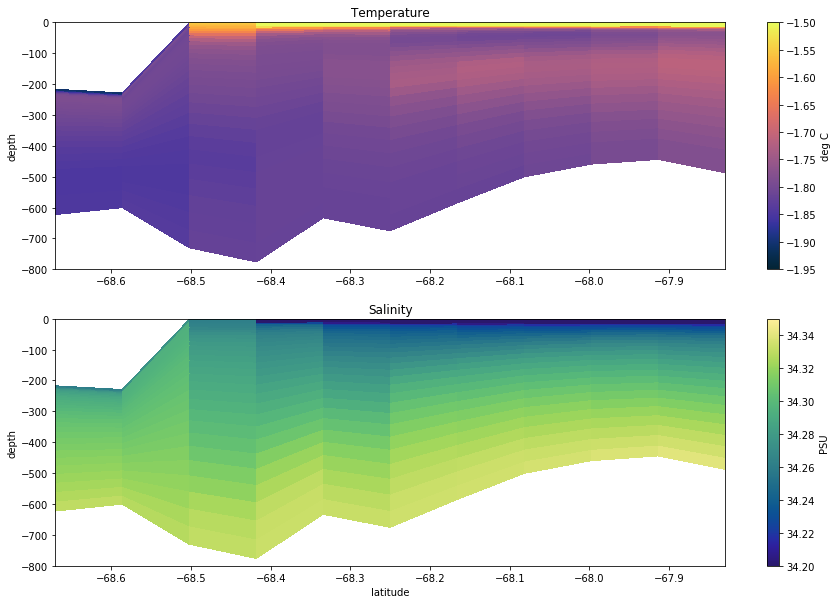

define slice
set up widget


interactive(children=(IntSlider(value=5, description='month', max=11), Output()), _dom_classes=('widget-interact',))

In [17]:
plot_cavity(low,amery,tmin=-1.95,tmax=-1.5,smin=34.2,smax=34.35,mean=True,max_depth=800)
plot_cavity(low,amery,tmin=-1.95,tmax=-1.5,smin=34.2,smax=34.35,mean=False,max_depth=800)